In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [19]:
# Load Final Dataset
df = pd.read_csv(r"C:\Users\Vedant\Desktop\TRAFFIC\Merge Data\final_dataset.csv", parse_dates=['Date'])

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort data by Date
df = df.sort_values(by='Date')

print("✅ Data Loaded Successfully!")


✅ Data Loaded Successfully!


In [21]:
# Take a 20% Sample for EDA
sample_frac = 0.2
df_sampled = df.sample(frac=sample_frac, random_state=42)

# Save Sampled Data for Future Use
df_sampled.to_csv(r"C:\Users\Vedant\Desktop\TRAFFIC\Merge Data.csv", index=False)

print(f"✅ Sampled {sample_frac * 100}% of the data and saved as 'sample_data.csv'!")


✅ Sampled 20.0% of the data and saved as 'sample_data.csv'!


In [22]:
# Basic Info
print("\n🔍 Dataset Info:")
df_sampled.info()

# Check Missing Values
print("\n🚨 Missing Values Summary:")
missing_counts = df_sampled.isnull().sum()
missing_percent = (missing_counts / len(df_sampled)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percent})

# Display missing values only if present
if missing_data['Missing Values'].sum() > 0:
    print(missing_data[missing_data['Missing Values'] > 0])
else:
    print("✅ No Missing Values Found!")




🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 342521 entries, 753883 to 1603501
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   RequestID  342521 non-null  int64         
 1   Boro       342521 non-null  object        
 2   HH         342521 non-null  int64         
 3   MM         342521 non-null  int64         
 4   Vol        342521 non-null  int64         
 5   SegmentID  342521 non-null  int64         
 6   WktGeom    342521 non-null  object        
 7   street     342521 non-null  object        
 8   fromSt     342521 non-null  object        
 9   toSt       342521 non-null  object        
 10  Direction  342521 non-null  object        
 11  Date       342521 non-null  datetime64[ns]
 12  PRCP       342521 non-null  float64       
 13  SNOW       342521 non-null  float64       
 14  TMIN       342521 non-null  float64       
 15  TMAX       342521 non-null  float64       
dtypes:

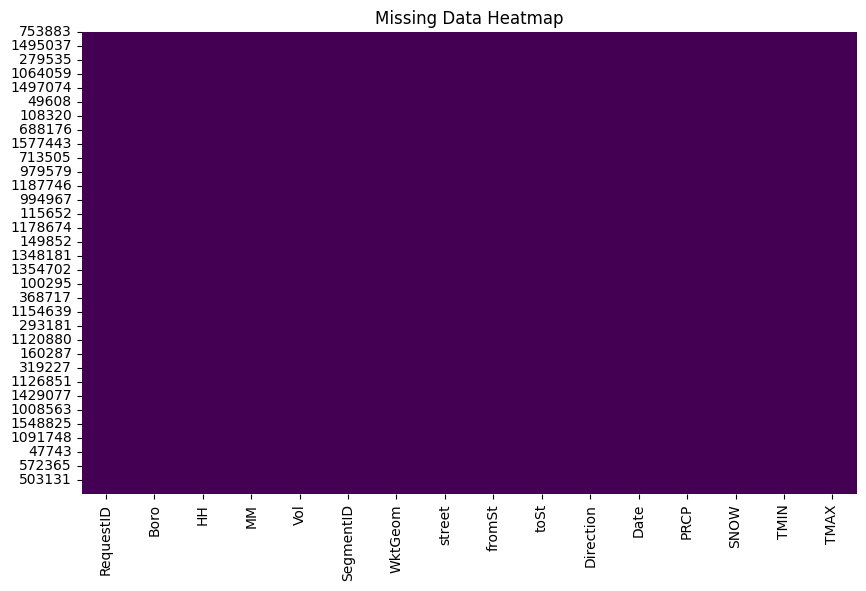

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sampled.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


In [24]:
print("\n📊 Summary Statistics:")
print(df_sampled.describe())



📊 Summary Statistics:
          RequestID             HH             MM            Vol  \
count  342521.00000  342521.000000  342521.000000  342521.000000   
mean    20384.38950      11.502714      22.432727     112.979242   
min      1148.00000       0.000000       0.000000       0.000000   
25%     11652.00000       6.000000       0.000000      18.000000   
50%     20280.00000      11.000000      15.000000      59.000000   
75%     29612.00000      18.000000      30.000000     134.000000   
max     37699.00000      23.000000      50.000000    5409.000000   
std     10492.61193       6.928778      16.790671     192.035787   

          SegmentID                           Date           PRCP  \
count  3.425210e+05                         342521  342521.000000   
mean   4.227700e+05  2015-09-08 14:40:18.820451584       0.128160   
min    4.400000e+01            2000-01-01 00:00:00       0.000000   
25%    4.414800e+04            2012-02-07 00:00:00       0.000000   
50%    8.896800e+04

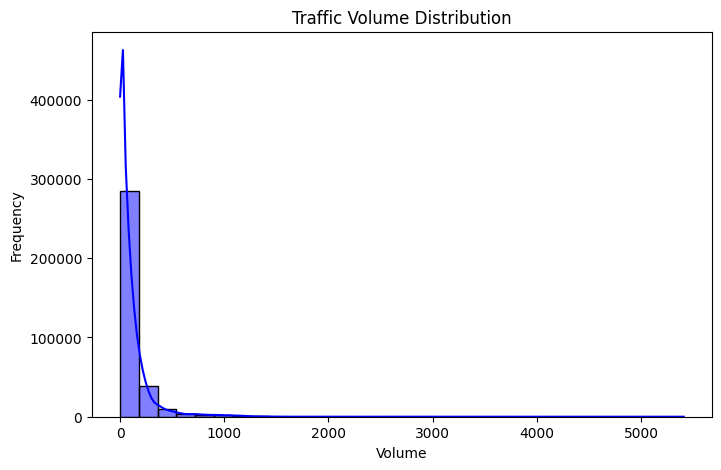

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df_sampled['Vol'], bins=30, kde=True, color='blue')
plt.title("Traffic Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


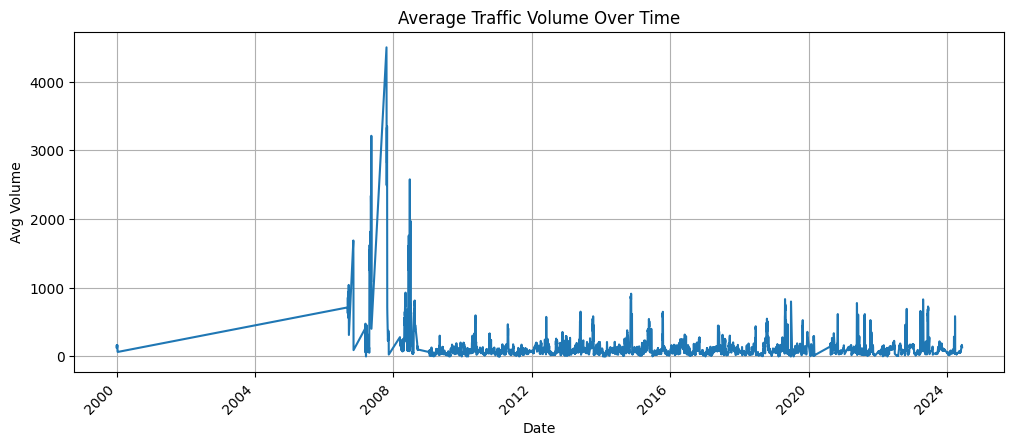

In [26]:
plt.figure(figsize=(12, 5))
df_sampled.groupby('Date')['Vol'].mean().plot()
plt.title("Average Traffic Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Volume")
plt.xticks(rotation=45)
plt.grid()
plt.show()


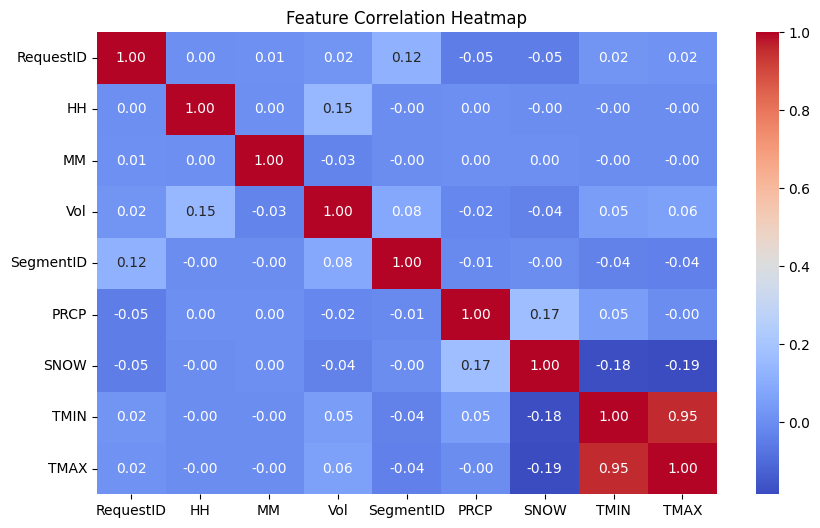

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sampled.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


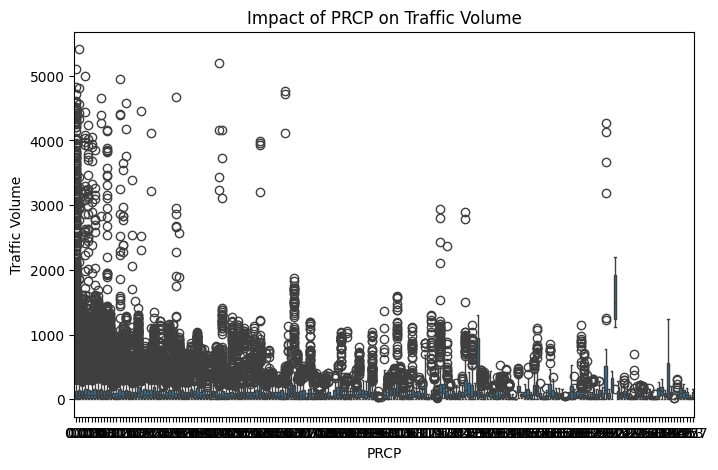

In [28]:
weather_features = ['PRCP', 'TEMP', 'WIND']
for feature in weather_features:
    if feature in df_sampled.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=feature, y='Vol', data=df_sampled)
        plt.title(f"Impact of {feature} on Traffic Volume")
        plt.xlabel(feature)
        plt.ylabel("Traffic Volume")
        plt.show()


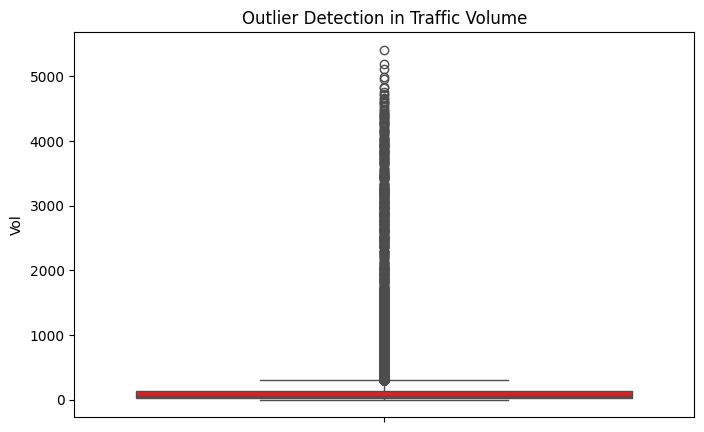

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(df_sampled['Vol'], color='red')
plt.title("Outlier Detection in Traffic Volume")
plt.show()


In [32]:
# Reload dataset if needed
df = pd.read_csv("Merge Data/final_dataset.csv", parse_dates=['Date'])

# Take a 20% Sample for EDA
sample_frac = 0.2
df_sampled = df.sample(frac=sample_frac, random_state=42)

# Ensure 'Date' is in datetime format
df_sampled['Date'] = pd.to_datetime(df_sampled['Date'], errors='coerce')

# Reset index in case 'Date' was removed
df_sampled.reset_index(inplace=True, drop=True)

# Ensure 'Date' exists before setting index
if 'Date' in df_sampled.columns:
    df_sampled = df_sampled.set_index('Date')
else:
    raise ValueError("❌ 'Date' column is missing!")

# Drop NaNs in 'Vol' to prevent decomposition errors
df_sampled = df_sampled.dropna(subset=['Vol'])

# Perform decomposition
decomposition = seasonal_decompose(df_sampled['Vol'], model='additive', period=30)

# Plot Decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='black')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ EDA Completed - Insights Ready!")


FileNotFoundError: [Errno 2] No such file or directory: 'Merge Data/final_dataset.csv'